In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# column index
col_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df = pd.read_csv('processed.cleveland.data', names=col_names)
df.head()

# fill nan
for col in col_names:
    df[col].fillna(df[col].mean(), inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.000000,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.000000,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.000000,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.000000,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.000000,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.000000,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.000000,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.000000,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.000000,3.0,1


In [3]:
sample_num = df.shape[0]
feat_num = df.shape[1] - 1
class_num = np.unique(np.array(df['num']))

print('Sample Number:\t', sample_num)
print('Feature Number:\t', feat_num)
print('Class Number:\t', class_num)

Sample Number:	 303
Feature Number:	 13
Class Number:	 [0 1 2 3 4]


In [4]:
X = np.array(df[col_names[0:feat_num]])
y0 = np.array(df['num'])
y = np.zeros(sample_num)
# fill into two classes
for i in range(sample_num):
    if y0[i] > 0:
        y[i] = 1

print(X.shape)
print(y)

(303, 13)
[0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1.
 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1.
 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1.
 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0.
 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0.
 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0.]


## Logistic Regression

In [5]:
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_fscore_support

nfold = 10
kf = KFold(n_splits=nfold,shuffle=True)
prec = []
rec = []
f1 = []
err_rate = []

for Itr, Its in kf.split(X):
            
    # Get training and test data
    Xtr = X[Itr,:]
    ytr = y[Itr]
    Xts = X[Its,:]
    yts = y[Its]
    
    # Transform the data
    xscal = StandardScaler()
    Xtr1 = xscal.fit_transform(Xtr)
    Xts1 = xscal.transform(Xts)
        
    # Fit a model
    logreg.fit(Xtr1, ytr)
    
    # Predict the labels on the test data
    yhat = logreg.predict(Xts1)
    # print('1-------------')
    # print(ytr)
    # print(yhat)
    # print('1-------------')
    
    # Measure the precision, recall and f1-score.
    preci,reci,f1i,_= precision_recall_fscore_support(yts,yhat,average='binary') 
    prec.append(preci)
    rec.append(reci)
    f1.append(f1i)
    err_rate.append(np.mean(yts != yhat))

# Take the mean performance metrics over the different folds.
prec = np.mean(prec)
rec = np.mean(rec)
f1 = np.mean(f1)
err_mean = np.mean(err_rate)

print('Precision =  {0:.4f}'.format(prec))
print('Recall =     {0:.4f}'.format(rec))
print('f1 =         {0:.4f}'.format(f1))
print('error rate = {0:.4f}'.format(err_mean))

NameError: name 'StandardScaler' is not defined

## NN

In [110]:
from sklearn.model_selection import train_test_split

Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=0.15)

xmean = np.mean(Xtr,axis=0)
xstd = np.std(Xtr,axis=0)
Xtr_scale = (Xtr-xmean[None,:])/xstd[None,:]
Xts_scale = (Xts-xmean[None,:])/xstd[None,:]

In [111]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow.keras.backend as K

K.clear_session()

In [112]:
nin = Xtr.shape[1]
nout = np.max(ytr)+1
nh = 256
model = Sequential()
model.add(Dense(nh, input_shape=(nin,), activation='sigmoid', name='hidden'))
model.add(Dense(nout, activation='softmax', name='output'))

In [113]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 256)               3584      
_________________________________________________________________
output (Dense)               (None, 2)                 514       
Total params: 4,098
Trainable params: 4,098
Non-trainable params: 0
_________________________________________________________________


In [114]:
from tensorflow.keras import optimizers

opt = optimizers.Adam(lr=0.001) 
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [115]:
rates = [0.04, 0.02, 0.01, 0.005]
batch_size = 100
loss_hist = []

# TODO
for lr in rates:
        
    # Clear the session
    K.clear_session()

    # Build the model
    model = Sequential()
    model.add(Dense(nh, input_shape=(nin,), activation='sigmoid', name='hidden'))
    model.add(Dense(nout, activation='softmax', name='output'))

    # Select the optimizer with the correct learning rate to test
    opt = optimizers.Adam(lr=lr) 
    model.compile(optimizer=opt,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])       
        
    # Fit the model    
    hist = model.fit(Xtr_scale, ytr, epochs=20, batch_size=batch_size, 
              validation_data=(Xts_scale,yts))    
    
    # Save the loss history
    loss_hist.append(hist.history['loss'])

    # Print the final accuracy
    val_acc = hist.history['val_acc'][-1]
    print("lr=%12.4e test accuracy=%f" % (lr, val_acc))

Train on 257 samples, validate on 46 samples
Epoch 1/20
257/257 [==============================] - 0s 227us/sample - loss: 2.0586 - acc: 0.5720 - val_loss: 1.1302 - val_acc: 0.7174
Epoch 2/20
257/257 [==============================] - 0s 19us/sample - loss: 1.6748 - acc: 0.6381 - val_loss: 0.8310 - val_acc: 0.8261
Epoch 3/20
257/257 [==============================] - 0s 23us/sample - loss: 0.6686 - acc: 0.8327 - val_loss: 1.6310 - val_acc: 0.7609
Epoch 4/20
257/257 [==============================] - 0s 23us/sample - loss: 1.1340 - acc: 0.7626 - val_loss: 1.9766 - val_acc: 0.6304
Epoch 5/20
257/257 [==============================] - 0s 27us/sample - loss: 1.0088 - acc: 0.8093 - val_loss: 1.3441 - val_acc: 0.8043
Epoch 6/20
257/257 [==============================] - 0s 19us/sample - loss: 0.6921 - acc: 0.8560 - val_loss: 1.1224 - val_acc: 0.8261
Epoch 7/20
257/257 [==============================] - 0s 27us/sample - loss: 0.7763 - acc: 0.8599 - val_loss: 1.0177 - val_acc: 0.8261
Epoch 8/2

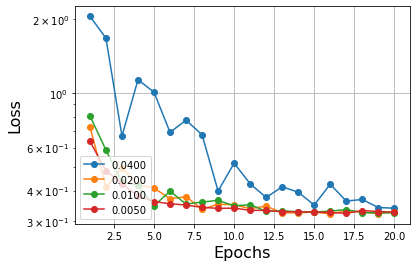

In [116]:
ntest = len(loss_hist)
ntr = Xtr.shape[0]
batch_size=100
for it, loss in enumerate(loss_hist):
    
    nepochs = len(loss)
    epochs = np.arange(1,nepochs+1)
    plt.semilogy(epochs, loss, 'o-')

    rate_str = ['{0:5.4f}'.format(lr) for lr in rates]

plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.legend(rate_str,loc='lower left')
plt.grid()

## Cluster

In [117]:
from sklearn.cluster import KMeans

n_clusters = 2

cluster = KMeans(n_clusters=n_clusters, random_state=0)
yhat = cluster.fit_predict(X)

print(np.mean(y == yhat))

0.42244224422442245


## PCA Graph

In [118]:
from sklearn.decomposition import PCA

# Construct the PCA object
ncomp = 2
pca = PCA(n_components=ncomp, 
          svd_solver='randomized', whiten=True)

# Fit and transform the data
pca.fit(X)
Z = pca.transform(X)

Text(0, 0.5, 'PC 1')

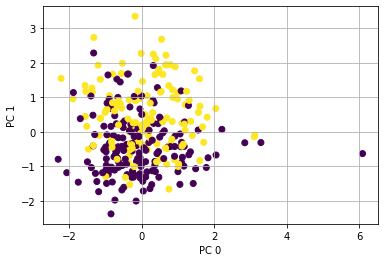

In [119]:
# Plot the first two coefficients
plt.scatter(Z[:,0], Z[:,1], c=y)
plt.grid()
plt.xlabel('PC 0')
plt.ylabel('PC 1')